## <span style="color:orange"> Universidad de los Andes </span>

## Maestría en Inteligencia Analítica para la Toma de Desiciones



En este notebook se implementan diferentes algorítmos y modelos para resolver el problema conocido como **Churn**, para identificar los clientes con problabilidad de deserción, es decir que cancelen los productos que actualmente tienen en una entidad financiera 

### Cargamos los diferentes algotígmos y modelos

In [1]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
%matplotlib inline
from matplotlib import pyplot
import seaborn as sb
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_curve,roc_auc_score, auc, confusion_matrix, mean_squared_error, r2_score, classification_report
from livelossplot import PlotLossesKeras
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold


C:\Users\camiloto\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\camiloto\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## 1.  Tratamiento inicial de los datos

Se carga la base de datos que tiene una partición de **80 - 20**

In [2]:
path=  '../Codigo/'
datos = pd.read_csv(os.path.join(path,'BD/BD_SEED','Muestra_Anual_Seed_12_T80_20.txt'), sep='|' , encoding='latin-1', decimal=".")

C:\Users\camiloto\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (667) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
datos.groupby('Target')['consecutivo'].count()

Target
0    129536
1     32384
Name: consecutivo, dtype: int64

In [4]:
datos.head(10)

,consecutivo,N_CART_CRED_1,N_CART_CRED_2,N_CART_CRED_3,N_CART_CRED_4,N_CART_CRED_5,N_CART_CRED_6,N_CART_CRED_7,N_CART_CRED_8,N_CART_CRED_9,...,REGIONAL,Municipio_DANE,Departamento_DANE,Competencia,Ruralidad,Poblacion_Mpio,Postconflicto,Victima,SEGURO,Target
0,26662,1,1,1,1,1,1,1,1,1,...,BOGOTA,San Juan de Río Seco,Cundinamarca,Sin_Competencia,Rural,9670,N,N,N,1
1,33311,1,1,1,1,1,1,1,1,1,...,BOGOTA,Guayabal de Siquima,Cundinamarca,Sin_Competencia,Rural,3659,S,N,N,1
2,45533,0,0,0,0,0,0,0,0,0,...,BOGOTA,San Francisco,Cundinamarca,Sin_Competencia,Intermedio,10011,N,N,N,1
3,50364,1,1,1,1,1,1,1,1,1,...,BOGOTA,Villa de San Diego de Ubate,Cundinamarca,Media,Intermedio,39393,N,N,N,1
4,56561,1,1,1,1,1,1,1,1,1,...,BOGOTA,Viotá,Cundinamarca,Sin_Competencia,Intermedio,13328,S,S,N,1
5,60231,0,0,0,0,0,0,0,0,0,...,BOGOTA,Puerto Carreño,Vichada,Baja,Rural disperso,16504,N,N,N,1
6,67736,0,0,0,0,0,0,0,0,0,...,ANTIOQUIA,Armenia,Antioquia,Sin_Competencia,Rural,3945,N,N,N,1
7,93903,0,0,0,0,0,0,0,0,0,...,ANTIOQUIA,Puerto Boyacá,Boyacá,Media,Intermedio,56517,N,N,N,1
8,96626,0,0,0,0,0,0,0,0,0,...,SANTANDERES,Bucaramanga,Santander,Alta,Ciudades y aglomeraciones,528683,N,S,N,1
9,102445,0,0,0,0,0,0,0,0,0,...,ORIENTE,Belén,Boyacá,Sin_Competencia,Intermedio,6966,N,N,N,1


In [5]:
datos.Municipio_DANE

0                San Juan de Río Seco
1                 Guayabal de Siquima
2                       San Francisco
3         Villa de San Diego de Ubate
4                               Viotá
5                      Puerto Carreño
6                             Armenia
7                       Puerto Boyacá
8                         Bucaramanga
9                               Belén
10                          El Espino
11                          San Mateo
12                             Timbío
13                             Quibdó
14                           Medellín
15                          Guadalupe
16                              Tello
17                             Teruel
18                           Riohacha
19                            Durania
20                              Ocaña
21                             Málaga
22                              Girón
23                            Matanza
24                            Cerrito
25                   Sabana de Torres
26          

In [6]:
datos.shape

(161920, 688)

In [7]:
total = datos.shape[0]
total

161920

In [8]:
# total de ceros en activos
ceros_act =np.count_nonzero(datos.Activos==0)
ceros_act

11822

In [9]:
# total de ceros en pasivos
ceros_pas = np.count_nonzero(datos.Pasivos==0)
ceros_pas

70310

In [10]:
# total de ceros en Ingresos
ceros_ing=np.count_nonzero(datos.Ingresos==0)
ceros_ing

1486

In [11]:
# total de ceros en egresos
ceros_egr =np.count_nonzero(datos.Egresos==0)
ceros_egr

3295

In [12]:
# total de ceros en patrimonio
ceros_pat = np.count_nonzero(datos.Patrimonio==0)
ceros_pat

11797

In [13]:
total, ceros_act, ceros_egr, ceros_ing, ceros_pas, ceros_pat

(161920, 11822, 3295, 1486, 70310, 11797)

### Verificación de Valores NULOS

In [14]:
datos.isnull().sum().sort_values(ascending=False)

Tipo_Empleo                 145623
Tiempo_BAC                       3
Edad                             2
SLD_VCDO_CART_CRED_9             0
SLD_VCDO_SOBREGIROS_5            0
SLD_VCDO_SOBREGIROS_4            0
SLD_VCDO_SOBREGIROS_3            0
SLD_VCDO_SOBREGIROS_2            0
SLD_VCDO_SOBREGIROS_1            0
SLD_VCDO_CART_CRED_12            0
SLD_VCDO_CART_CRED_11            0
SLD_VCDO_CART_CRED_10            0
Target                           0
SLD_VCDO_CART_CRED_7             0
SLD_VCDO_CART_CRED_6             0
SLD_VCDO_CART_CRED_5             0
SLD_VCDO_CART_CRED_4             0
SLD_VCDO_CART_CRED_3             0
SLD_VCDO_CART_CRED_2             0
SLD_VCDO_CART_CRED_1             0
VALOR_CDAT_12                    0
VALOR_CDAT_11                    0
SLD_VCDO_CART_CRED_8             0
SLD_VCDO_SOBREGIROS_6            0
VALOR_CDAT_9                     0
SLD_VCDO_TARJ_CREDITO_5          0
TOTALCOLOCACIONES_1              0
SLD_VCDO_TARJ_CREDITO_12         0
SLD_VCDO_TARJ_CREDIT

### 1.1. Tratamiento variables con valores nulos

#### Nulos: Tipo_Empleo

Al analizar la variable de tipo de empleo se encuentra que **90%** de los registros tienen NA, por lo que se elimina de la base de datos, el mismo procedimiento se realiza para Codigo ciiu

In [15]:
del datos['Tipo_Empleo']
del datos['Codigo_ciiu']

#### Nulos Tiempo en el Banco

In [16]:
datos[['consecutivo','Tiempo_BAC']][datos['Tiempo_BAC'] .isnull()]

,consecutivo,Tiempo_BAC
17793,12970810,NaN
47305,12339537,NaN
161726,12875634,NaN


In [17]:
datos.drop(datos[datos.Tiempo_BAC.isnull()].index, inplace=True)

In [18]:
datos[['consecutivo','Tiempo_BAC']][datos['Tiempo_BAC'] .isnull()]

,consecutivo,Tiempo_BAC


## Nulos: Edad

In [19]:
datos[['consecutivo','Edad']][datos['Edad'] .isnull()]


,consecutivo,Edad
26892,8611339,NaN
97396,6569472,NaN


In [20]:
datos.drop(datos[datos.Edad.isnull()].index, inplace=True)

In [21]:
datos[['consecutivo','Edad']][datos['Edad'] .isnull()]


,consecutivo,Edad


### 1.2.  Tratamiento variables categóricas

#### Creeamos un nuevo dataset con las variables categóricas

In [22]:
datos_=datos.loc[:,('banca_cliente','Depende_Tercero','Profesion','Estado_Civil',
        'Nivel_Educativo','Genero','Victima','ZONAL','REGIONAL','Municipio_DANE','Departamento_DANE',
        'Competencia','Ruralidad','Postconflicto','SEGURO','NOMBRE_OFICINA','FAG_1','FAG_2','FAG_3',
        'FAG_4','FAG_5','FAG_6','FAG_7','FAG_8','FAG_9','FAG_10','FAG_11','FAG_12','hipoteca_1',
        'hipoteca_2','hipoteca_3','hipoteca_4','hipoteca_5','hipoteca_6','hipoteca_7','hipoteca_8',
        'hipoteca_9','hipoteca_10','hipoteca_11','hipoteca_12','CALIF_CART_CLIENTE_1','CALIF_CART_CLIENTE_2',
        'CALIF_CART_CLIENTE_3','CALIF_CART_CLIENTE_4','CALIF_CART_CLIENTE_5','CALIF_CART_CLIENTE_6',
        'CALIF_CART_CLIENTE_7','CALIF_CART_CLIENTE_8','CALIF_CART_CLIENTE_9','CALIF_CART_CLIENTE_10',
        'CALIF_CART_CLIENTE_11','CALIF_CART_CLIENTE_12')]

### Transformación de variables categóricas

In [23]:
# Validamos el tamaño del dataset antes de convertir a dummies las variables categóricas
datos.shape

(161915, 686)

#### A continuación, se crean las variables dummies 

In [24]:
datos_dum = pd.get_dummies(datos)
datos_dum.shape

(161915, 2470)

# 2. Implementación de modelos

## 2.1. Regresión logística con la base original

A continuación, se implementa el modelo de regresión logística con la base de datos original, a la cual, después del procesamiento inicial, sólo se realizó la transformación de las variables categóricas a dummies

### Partición


In [25]:
# Separación de la variable target
y=datos['Target']
y=pd.DataFrame(y)

In [26]:
# Separación de las variables independientes
X=datos_dum.iloc[:,:]
del X['consecutivo']
del X['Target']

In [27]:
#Realizamos la partición
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=2)

In [28]:
#Se exploran las dimensiones de cada partición
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((113340, 2468), (48575, 2468), (113340, 1), (48575, 1))

### Modelo Logit

A continuación, se implementa el modelo de regresión logística con el set de datos original, al cual se le transforman las variables categoricas en variables dummies. 

In [29]:
LogReg_1 = LogisticRegression()
LogReg_1.fit(X_train, y_train)

C:\Users\camiloto\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [30]:
X_train.shape

(113340, 2468)

In [31]:
y_pred_RL = LogReg_1.predict(X_test)

In [32]:
target_names = ['No abandono', 'Si abandono']
label = ['x','y']
print(classification_report(y_test, y_pred_RL, target_names=target_names) )


             precision    recall  f1-score   support

No abandono       0.83      0.98      0.90     39006
Si abandono       0.72      0.17      0.28      9569

avg / total       0.81      0.82      0.78     48575



Text(0.5,1,'Confusion Matrix')

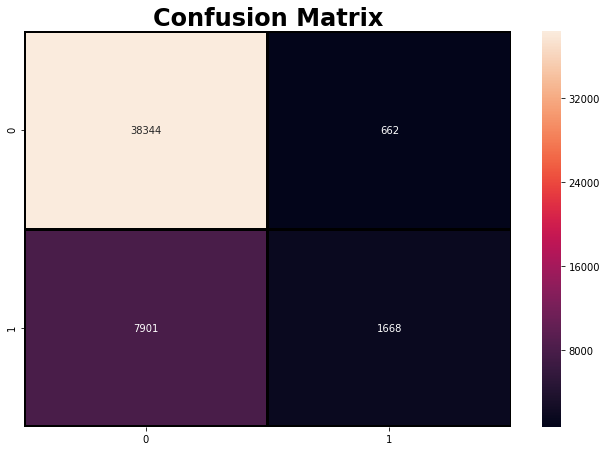

In [33]:
plt.figure(figsize=(24,16))
plt.subplot(221)
cm_1=sb.heatmap(confusion_matrix(y_test,y_pred_RL),annot=True,fmt = "d",linecolor="k",linewidths=2)
plt.title("Confusion Matrix",fontsize=24,fontweight="bold")

## Métricas calculadas a partir de una matriz de confusión

In [34]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred_RL)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

**Terminología básica

- **Verdaderos positivos (TP)**: El modelo predice correctamente que tienen diabetes
- **Negativos verdaderos (TN)**: predijimos correctamente que no tienen diabetes
- **Falsos positivos (PF)**: predijimos incorrectamente que tienen diabetes (un "error de tipo I")
- **Falsos negativos (FN)**: predijimos incorrectamente que no tienen diabetes (un "error de Tipo II")

### Cálculo de las métricas

**Precisión de la clasificación**: en general, ¿Con qué frecuencia es correcto el clasificador?

In [35]:
Accuracy= ("Accuracy               = "+str(round((TP + TN) / float(TP + TN + FP + FN),2)))
print(Accuracy)
#print(metrics.accuracy_score(y_test, y_pred_1))

Accuracy               = 0.82


**Classification Error:** en general, ¿con qué frecuencia el clasificador es incorrecto?

- También conocido como "tasa de clasificación errónea""

In [36]:
Classification_Error = ("Classification Error   = "+str(round((FP + FN) / float(TP + TN + FP + FN),2)))
print(Classification_Error)
#print(1 - metrics.accuracy_score(y_test, y_pred_1))

Classification Error   = 0.18


**Sensitivity:** cuando el valor real es **positivo**, ¿con qué frecuencia es correcta la predicción?

- ¿Qué tan "sensible" es el clasificador para detectar casos positivos?
- También conocido como "True Positive Rate" o "Recall"

 




In [37]:
Sensitivity = ("Sensitivity            = " +str(round(TP / float(TP + FN),2)))
print(Sensitivity)
#print(metrics.recall_score(y_test, y_pred_1))

Sensitivity            = 0.17


**Specificity:** Cuando el valor real es **negativo**, ¿con qué frecuencia es correcta la predicción?

- ¿En qué medida "específico" (o "selectivo") es el clasificador para predecir casos positivos?



In [38]:
Specificity =("Specificity            = " +str(round(TN / float(TN + FP),2)))
print(Specificity)

Specificity            = 0.98


**False Positive Rate:** cuando el valor real es negativo, ¿con qué frecuencia es **incorrecta** la predicción?

In [39]:
False_Positive_rate=("False Positive Rate    = "+str(round(FP / float(TN + FP),2)))
print(False_Positive_rate)

False Positive Rate    = 0.02


**Precision:** Cuando se predice un valor positivo, ¿con qué frecuencia es correcta la predicción?

- ¿Qué tan preciso es el clasificador al predecir instancias positivas?

In [40]:
Precision=("Precision              = "+str  (round(TP / float(TP + FP),3)))
print(Precision)
#print(metrics.precision_score(y_test, y_pred_1))

Precision              = 0.716


In [41]:
print("---------------------------------Métricas modelo 1 **Regresión Logística** ------------------------------------------------")
print(Accuracy),print(Classification_Error), print(Sensitivity), print(Specificity), print(False_Positive_rate),
print(Precision)

---------------------------------Métricas modelo 1 **Regresión Logística** ------------------------------------------------
Accuracy               = 0.82
Classification Error   = 0.18
Sensitivity            = 0.17
Specificity            = 0.98
False Positive Rate    = 0.02
Precision              = 0.716


C:\Users\camiloto\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


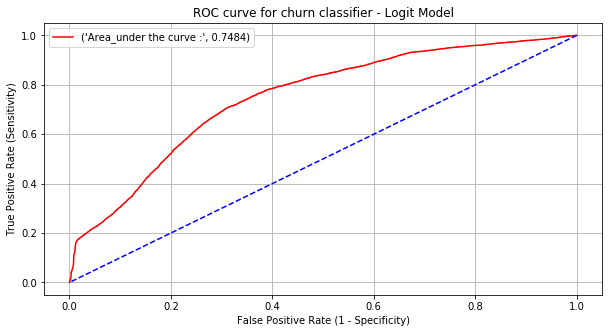

In [42]:
predicting_probabilites = LogReg_1.predict_proba(X_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test, predicting_probabilites)
#plt.subplot(222)
plt.figure(figsize=(10,5))
plt.plot(fpr,tpr,label = ("Area_under the curve :",round(auc(fpr,tpr),4)),color = "r")
plt.plot([1,0],[1,0],linestyle = "dashed",color ="b")
plt.legend(loc = "best")
# show the plot
plt.title('ROC curve for churn classifier - Logit Model')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
pyplot.show()

### Análisis de los resultados del modelo de regresión logística

De acuerdo con los resultados de este primer modelo de **Regresión Logística** con todas las variables, se observa que, en general el modelo clasifica correctamente el 77% de los casos, sin embargo, el error de la clasificación es del 23%, en cuanto a la sensibilidad, el valor de casos positivos clasificados correctamente  es del 37%, mientras que la especificidad, es decir, los casos negativos que el modelo clasifica correctamente es del 93% y los casos negativos que son clasificados de forma erronea es del 7%.



## Random forest

In [43]:
cfl = RandomForestClassifier()

In [44]:
cfl.fit(X_train, y_train)

C:\Users\camiloto\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [45]:
y_pred_cfl = cfl.predict(X_test)

In [46]:
# Se calcula el MSE(mean squared error)
mse_cfl=("Mean squared error - Random Forest: %.4f"
      % mean_squared_error(y_test, y_pred_cfl))
print(mse_cfl)

Mean squared error - Random Forest: 0.0774


In [47]:
target_names = ['No abandono', 'Si abandono']
print(classification_report(y_test, y_pred_cfl, target_names=target_names) )


             precision    recall  f1-score   support

No abandono       0.93      0.97      0.95     39006
Si abandono       0.86      0.72      0.79      9569

avg / total       0.92      0.92      0.92     48575



Text(0.5,1,'Confusion Matrix')

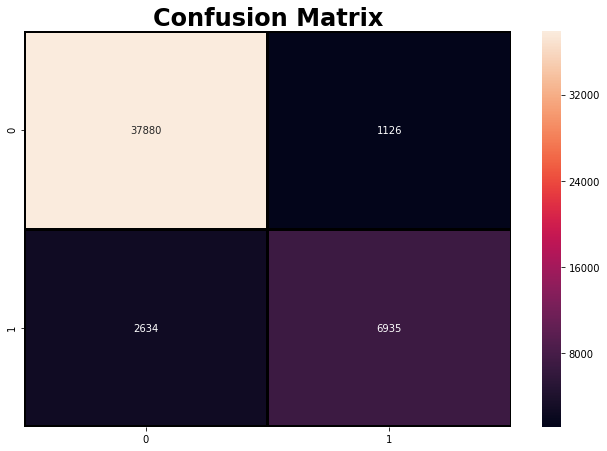

In [48]:
plt.figure(figsize=(24,16))
plt.subplot(221)
cm_1=sb.heatmap(confusion_matrix(y_test,y_pred_cfl),annot=True,fmt = "d",linecolor="k",linewidths=2)
plt.title("Confusion Matrix",fontsize=24,fontweight="bold")

## Métricas calculadas a partir de una matriz de confusión

In [49]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred_cfl)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

### Cálculo de las métricas

Accuracy= ("Accuracy               = "+str(round((TP + TN) / float(TP + TN + FP + FN),2)))

Classification_Error = ("Classification Error   = "+str(round((FP + FN) / float(TP + TN + FP + FN),2)))

Sensitivity = ("Sensitivity            = " +str(round(TP / float(TP + FN),2)))

Specificity =("Specificity            = " +str(round(TN / float(TN + FP),2)))

Precision=("Precision              = "+str  (round(TP / float(TP + FP),3)))

print("---------------------------------Métricas modelo 2 **Random Forest** ------------------------------------------------")
print(Accuracy),print(Classification_Error), print(Sensitivity), print(Specificity), print(False_Positive_rate),
print(Precision)

---------------------------------Métricas modelo 2 **Random Forest** ------------------------------------------------
Accuracy               = 0.92
Classification Error   = 0.08
Sensitivity            = 0.72
Specificity            = 0.97
False Positive Rate    = 0.02
Precision              = 0.86


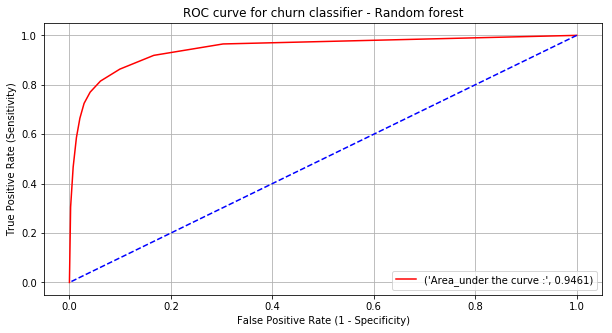

In [50]:
predicting_probabilites_1 = cfl.predict_proba(X_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test, predicting_probabilites_1)
#plot.subplot(222)
plt.figure(figsize=(10,5))
plt.plot(fpr,tpr,label = ("Area_under the curve :",round(auc(fpr,tpr),4)),color = "r")
plt.plot([1,0],[1,0],linestyle = "dashed",color ="b")
plt.legend(loc = "best")
# show the plot
plt.title('ROC curve for churn classifier - Random forest')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
pyplot.show()

### Análisis de los resultados del modelo de Random Forest 

De acuerdo con los resultados del modelo de **Random Forest** con todas las variables, se observa que, en general el modelo clasifica correctamente el 90% de los casos, en cuanto a la sensibilidad, el valor de casos positivos clasificados correctamente  es del 77%, mientras que la especificidad, es decir, los casos negativos que el modelo clasifica correctamente es del 95% y los casos negativos que son clasificados de forma erronea es del 7%.

## 2.2. El siguiente paso en la metodología es realizar el proceso de selección de variables para realizar la reducción de dimensionalidad

A continuación, se implementan dos estrategias: **1.** el algorítmo de **Random Forest** para selección de variables y **2.** el modelo  **PCA** de reducción de dimensionalidad, finalmente, los output de estos modelos se utilizan como input para el modelo de regresión logística y para la red neuronal.

#### 2.2.1. Random Forest

### Con el siguiente código se obtienen los Feature importances

In [51]:
feature_importances = pd.DataFrame(cfl.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

feature_importances

,importance
TOTALCAPTACIONES_9,0.055672
TOTALCAPTACIONES_3,0.047258
TOTALCAPTACIONES_11,0.032450
TOTALCAPTACIONES_7,0.031496
SALDO_AHORROS_2,0.024858
N_AHORROS_A_1,0.021967
N_AHORROS_I_2,0.020368
TOTALCAPTACIONES_12,0.018611
N_AHORROS_A_6,0.014584
N_AHORROS_I_1,0.014118


In [52]:
#Exportamos a Excel las variables principales para analizarlas
#writer = feature_importances.to_excel('feature_importances_80_20.xls')

In [53]:
# Con el factor 0.0007, separamos las variables más importantes
df_new = feature_importances[feature_importances.importance>0.00044]
df_new

,importance
TOTALCAPTACIONES_9,0.055672
TOTALCAPTACIONES_3,0.047258
TOTALCAPTACIONES_11,0.032450
TOTALCAPTACIONES_7,0.031496
SALDO_AHORROS_2,0.024858
N_AHORROS_A_1,0.021967
N_AHORROS_I_2,0.020368
TOTALCAPTACIONES_12,0.018611
N_AHORROS_A_6,0.014584
N_AHORROS_I_1,0.014118


In [54]:
df_new.shape

(220, 1)

### 2.3. Implementación de modelos con base en las variables selecionadas 

Una vez se obtienen las variables de los modelos implementados para hacer reducción de dimensionalidad, se procede a implementar los algorítmos de los modelos de clasificación, en este caso se trabaja con las variables más importantes obtenidas del modelo de **Random Forest**. En un segundo paso se implementan los mismos modelos con el input del **PCA** y finalmente se evaluan.

**2.3.1.** Implementación de modelos con base en las variables más importantes obtenidas en el random forest

In [55]:
# Separación de las variables independientes
X_=datos_dum.loc[:,
("TOTALCAPTACIONES_1",
"TOTALCAPTACIONES_2",
"TOTALCAPTACIONES_6",
"TOTALCAPTACIONES_10",
"Patrimonio",
"TOTALCOLOCACIONES_4",
"N_AHORROS_I_2",
"SALDO_AHORROS_A_12",
"TOTALCAPTACIONES_11",
"TOTALCAPTACIONES_7",
"SALDO_AHORROS_4",
"SALDO_CART_CRED_2",
"TOTALCOLOCACIONES_9",
"SALDO_AHORROS_A_1",
"SALDO_AHORROS_1",
"SALDO_AHORROS_A_8",
"SALDO_AHORROS_A_3",
"Ingresos",
"N_AHORROS_I_4",
"Tiempo_BAC",
"SALDO_AHORROS_A_5",
"TOTALCOLOCACIONES_11",
"TOTALCAPTACIONES_12",
"N_AHORROS_I_1",
"SALDO_AHORROS_A_2",
"SALDO_CART_CRED_4",
"Edad",
"SALDO_CART_CRED_6",
"Activos",
"SALDO_AHORROS11",
"N_AHORROS_I_9",
"TOTALCOLOCACIONES_5",
"SALDO_CART_CRED_3",
"N_cred_Ahor_7",
"N_AHORROS_I_7",
"TOTALCOLOCACIONES_1",
"SALDO_CART_CRED_1",
"Egresos",
"SEGURO_S",
"TOTALCAPTACIONES_4",
"TOTALCAPTACIONES_3",
"SALDO_AHORROS_A_10",
"TOTALCOLOCACIONES_7",
"TOTALCAPTACIONES_9",
"Poblacion_Mpio",
"TOTALCOLOCACIONES_6",
"TOTALCAPTACIONES_5",
"SALDO_CART_CRED_12",
"TOTALCOLOCACIONES_2",
"SALDO_CART_CRED_10",
"TOTALCOLOCACIONES_3",
"SALDO_CART_CRED_7",
"Competencia_Sin_Competencia",
"TOTALCOLOCACIONES_8",
"SALDO_CART_CRED_9",
"TOTALCAPTACIONES_8",
"Pasivos",
"N_AHORROS_I_8",
"TOTALCOLOCACIONES_12",
"SALDO_CART_CRED_5",
"N_CART_CRED_7",
"SALDO_AHORROS_A_7",
"TOTALCOLOCACIONES_10",
"SALDO_CART_CRED_8",
"N_AHORROS_A_5",
"N_AHORROS_A_12",
"N_AHORROS_A_1",
"SALDO_CART_CRED_11",
"N_AHORROS_I_3",
"SEGURO_N",
"VALOR_CDT_7",
"SALDO_AHORROS_A_9",
"SALDO_AHORROS_A_11",
"N_AHORROS_A_4",
"SALDO_AHORROS_A_6",
"SLD_VCDO_CART_CRED_11",
"SALDO_AHORROS_A_4",
"N_Deb_Ahor_2",
"banca_cliente_AGROPECUARIO",
"N_CDT_12",
"banca_cliente_PERSONAL",
"N_Deb_Ahor_4",
"SALDO_AHORROS_5",
"VALOR_CDT_4",
"N_AHORROS_A_11",
"N_cred_Ahor_1",
"SALDO_AHORROS_12",
"N_Ahorro_Out_6",
"VALOR_CDT_3",
"N_AHORROS_A_3",
"SLD_VCDO_CART_CRED_10",
"N_Deb_Ahor_6",
"SALDO_AHORROS_2",
"N_Ahorro_Out_2",
"SLD_VCDO_CART_CRED_12",
"SALDO_AHORROS_9",
"N_Deb_Ahor_12",
"N_Deb_Ahor_1",
"N_Deb_Ahor_5",
"SLD_VCDO_CART_CRED_7",
"N_Deb_Ahor_11",
"N_Deb_Ahor_10",
"N_Deb_Ahor_7",
"SALDO_AHORROS_3",
"Nivel_Educativo_BACHILLERATO",
"N_Deb_Ahor_3",
"SLD_VCDO_CART_CRED_2",
"Competencia_Alta",
"N_Deb_Ahor_9",
"SLD_VCDO_CART_CRED_5",
"SALDO_TARJ_CRED_3",
"Ruralidad_Ciudades y aglomeraciones",
"Nivel_Educativo_PRIMARIA",
"Genero_F",
"Estado_Civil_SOLTERO",
"Genero_M",
"N_CART_CRED_5",
"N_cred_Ahor_9",
"N_cred_Ahor_8",
"N_AHORROS_A_2",
"N_cred_Ahor_2",
"SALDO_AHORROS_6",
"N_Deb_Ahor_8",
"N_cred_Ahor_3",
"N_CART_CRED_6",
"VALOR_CDT_12",
"Estado_Civil_CASADO",
"N_cred_Ahor_12",
"Postconflicto_N",
"N_cred_Ahor_11",
"SLD_VCDO_CART_CRED_4",
"N_cred_Ahor_4",
"N_AHORROS_A_6",
"N_CART_CRED_10",
"SALDO_TARJ_CRED_1",
"SALDO_AHORROS_8",
"N_cred_Ahor_6",
"N_cred_Ahor_5",
"SALDO_AHORROS_7",
"SLD_VCDO_CART_CRED_9",
"VALOR_CDT_11",
"N_cred_Ahor_10",
"SLD_VCDO_CART_CRED_1",
"Profesion_SIN PROFESION",
"SLD_VCDO_CART_CRED_3",
"N_TARJ_CRED_6",
"N_TARJ_CRED_7",
"Victima_N",
"REGIONAL_BOGOTA",
"N_TARJ_CRED_10",
"N_AHORROS_I_12",
"Ruralidad_Intermedio",
"REGIONAL_ORIENTE",
"Estado_Civil_UNION LIBRE",
"SLD_VCDO_CART_CRED_8",
"N_AHORROS_A_8",
"N_CART_CRED_3",
"Postconflicto_S",
"N_CART_CRED_1",
"Victima_S",
"Profesion_AGRICULTOR",
"Ruralidad_Rural",
"Competencia_Baja",
"SALDO_AHORROS_10",
"SLD_VCDO_CART_CRED_6",
"N_AHORROS_I_11",
"Ruralidad_Rural disperso",
"Nivel_Educativo_NINGUNO",
"Nivel_Educativo_UNIVERSITARIO",
"N_TARJ_CRED_9",
"SALDO_TARJ_CRED_2",
"REGIONAL_OCCIDENTE",
"REGIONAL_SUR",
"Departamento_DANE_Antioquia",
"VALOR_CDT_10",
"REGIONAL_ANTIOQUIA",
"REGIONAL_CAFETERA",
"VALOR_CDT_2",
"Estado_Civil_VIUDO",
"Estado_Civil_SEPARADO",
"N_Ahorro_Out_1",
"Competencia_Media",
"N_CDT_1",
"SALDO_TARJ_CRED_10",
"Departamento_DANE_Valle del Cauca",
"REGIONAL_SANTANDERES",
"Depende_Tercero_N",
"Nivel_Educativo_OTROS ESTUDIOS",
"Departamento_DANE_Santander",
"SALDO_CTE_A_10",
"Departamento_DANE_Boyacá",
"N_AHORROS_A_7",
"VALOR_CDT_1",
"ZONAL_VALLE",
"VALOR_CDT_8",
"Departamento_DANE_Cundinamarca",
"N_AHORROS_I_6",
"Departamento_DANE_Cauca",
"N_AHORROS_A_9",
"N_CART_CRED_9",
"VALOR_CDT_5",
"Departamento_DANE_Bogotá, D.C.",
"SALDO_TARJ_CRED_12",
"ZONAL_BUCARAMANGA  SANTANDERES",
"Departamento_DANE_Huila",
"VALOR_CDT_6",
"SLD_VCDO_TARJ_CREDITO_1",
"Depende_Tercero_S",
"ZONAL_RISARALDA",
"REGIONAL_COSTA",
"N_AHORROS_I_5",
"Departamento_DANE_Tolima",
"ZONAL_BOGOTA",
"ZONAL_TUNJA",
"SALDO_TARJ_CRED_4",
"DESEMBOLSO_TARJ_CRED_2",
"VALOR_CDT_9",
"Departamento_DANE_Caldas",
"N_CART_CRED_2")]

### 2.3.2. Regresión Logística

Una vez se obtienen las variables más importantes del modelo Random Forest, se utilizan como input para correr de nuevo el modelo de regresión logística.

In [56]:
# partición con las variables selecccionadas random forest
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_, y, test_size = .3, random_state=2)

In [57]:
X_train_.shape, X_test_.shape, y_train_.shape, y_test_.shape

((113340, 219), (48575, 219), (113340, 1), (48575, 1))

In [58]:
LogReg = LogisticRegression()
LogReg.fit(X_train_, y_train_)

C:\Users\camiloto\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [59]:
y_pred_3 = LogReg.predict(X_test_)

In [60]:
print(classification_report(y_test_, y_pred_3, target_names=target_names))

             precision    recall  f1-score   support

No abandono       0.81      1.00      0.89     39006
Si abandono       0.60      0.02      0.04      9569

avg / total       0.76      0.80      0.72     48575



Text(0.5,1,'Confusion Matrix')

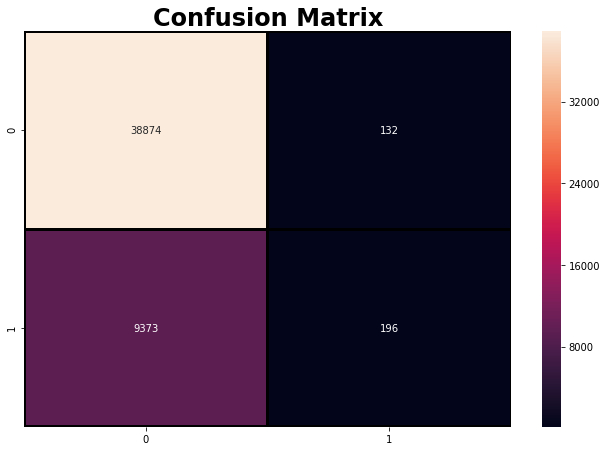

In [61]:
plt.figure(figsize=(24,16))
plt.subplot(221)
sb.heatmap(confusion_matrix(y_test_,y_pred_3),annot=True,fmt = "d",linecolor="k",linewidths=2)
plt.title("Confusion Matrix",fontsize=24,fontweight="bold")

## Métricas calculadas a partir de una matriz de confusión

In [62]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred_3)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

### Cálculo de las métricas

Accuracy= ("Accuracy               = "+str(round((TP + TN) / float(TP + TN + FP + FN),2)))

Classification_Error = ("Classification Error   = "+str(round((FP + FN) / float(TP + TN + FP + FN),2)))

Sensitivity = ("Sensitivity            = " +str(round(TP / float(TP + FN),2)))

Specificity =("Specificity            = " +str(round(TN / float(TN + FP),2)))

Precision=("Precision              = "+str  (round(TP / float(TP + FP),3)))

print("---------------------------------Métricas modelo 2 **Random Forest** ------------------------------------------------")
print(Accuracy),print(Classification_Error), print(Sensitivity), print(Specificity), print(False_Positive_rate),
print(Precision)

---------------------------------Métricas modelo 2 **Random Forest** ------------------------------------------------
Accuracy               = 0.8
Classification Error   = 0.2
Sensitivity            = 0.02
Specificity            = 1.0
False Positive Rate    = 0.02
Precision              = 0.598


### Análisis de los resultados del modelo de regresión logística con las variables más importantes del RF

De acuerdo con los resultados de este primer modelo de **Regresión Logística** con todas las variables, se observa que, en general el modelo clasifica correctamente el 76% de los casos, sin embargo, el error de la clasificación es del 24%, en cuanto a la sensibilidad, el valor de casos positivos clasificados correctamente  es del 36%, mientras que la especificidad, es decir, los casos negativos que el modelo clasifica correctamente es del 94% y los casos negativos que son clasificados de forma erronea es del 7%.

C:\Users\camiloto\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


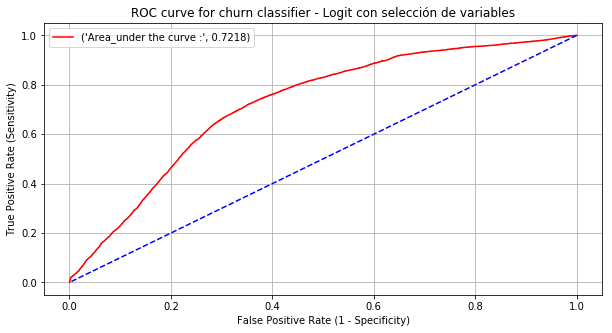

In [63]:
predicting_probabilites_2 = LogReg.predict_proba(X_test_)[:,1]
fpr,tpr,thresholds = roc_curve(y_test, predicting_probabilites_2)
#plot.subplot(222)
plt.figure(figsize=(10,5))
plt.plot(fpr,tpr,label = ("Area_under the curve :",round(auc(fpr,tpr),4)),color = "r")
plt.plot([1,0],[1,0],linestyle = "dashed",color ="b")
plt.legend(loc = "best")
# show the plot
plt.title('ROC curve for churn classifier - Logit con selección de variables')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
pyplot.show()

## **2.4.**   PCA

A continuación, se implementa el modelo de análisis de componentes principales - **PCA**, acto seguido, se implementan los modelos de regresión logística y red neural con base en los componentes principales.

## Preparamos BD para PCA (Variables categoricas= 53)

In [64]:
del datos['consecutivo']
del datos['Target']
del datos['banca_cliente']
del datos['Depende_Tercero']
del datos['Profesion']
del datos['Estado_Civil']
del datos['Nivel_Educativo']
del datos['Genero']
del datos['Victima']
del datos['ZONAL']
del datos['REGIONAL']
del datos['Municipio_DANE']
del datos['Departamento_DANE']
del datos['Competencia']
del datos['Ruralidad']
del datos['Postconflicto']
del datos['SEGURO']
del datos['NOMBRE_OFICINA']
del datos['FAG_1']
del datos['FAG_2']
del datos['FAG_3']
del datos['FAG_4']
del datos['FAG_5']
del datos['FAG_6']
del datos['FAG_7']
del datos['FAG_8']
del datos['FAG_9']
del datos['FAG_10']
del datos['FAG_11']
del datos['FAG_12']
del datos['hipoteca_1']
del datos['hipoteca_2']
del datos['hipoteca_3']
del datos['hipoteca_4']
del datos['hipoteca_5']
del datos['hipoteca_6']
del datos['hipoteca_7']
del datos['hipoteca_8']
del datos['hipoteca_9']
del datos['hipoteca_10']
del datos['hipoteca_11']
del datos['hipoteca_12']
del datos['CALIF_CART_CLIENTE_1']
del datos['CALIF_CART_CLIENTE_2']
del datos['CALIF_CART_CLIENTE_3']
del datos['CALIF_CART_CLIENTE_4']
del datos['CALIF_CART_CLIENTE_5']
del datos['CALIF_CART_CLIENTE_6']
del datos['CALIF_CART_CLIENTE_7']
del datos['CALIF_CART_CLIENTE_8']
del datos['CALIF_CART_CLIENTE_9']
del datos['CALIF_CART_CLIENTE_10']
del datos['CALIF_CART_CLIENTE_11']
del datos['CALIF_CART_CLIENTE_12']


In [65]:
datos.shape

(161915, 632)

### Se retiran variables con un unico valor, es decir, varianza igual a 0

In [66]:
var=np.std(datos, 0)
var2=var[var==0]
(var2)
#type(var2)

Beneficios_ICR_4         0.0
Beneficios_ICR_5         0.0
Beneficios_ICR_6         0.0
Beneficios_ICR_7         0.0
Beneficios_ICR_9         0.0
reestructuraciones_1     0.0
reestructuraciones_2     0.0
reestructuraciones_3     0.0
reestructuraciones_4     0.0
reestructuraciones_5     0.0
reestructuraciones_6     0.0
reestructuraciones_7     0.0
reestructuraciones_8     0.0
reestructuraciones_9     0.0
reestructuraciones_10    0.0
reestructuraciones_11    0.0
reestructuraciones_12    0.0
dtype: float64

In [67]:
del datos['TP_grande_1']
del datos['TP_grande_3']
del datos['TP_grande_4']
del datos['TP_grande_5']
del datos['TP_grande_8']
del datos['TP_grande_9']
del datos['TP_grande_10']
del datos['TP_grande_11']

del datos['Beneficios_ICR_2']
del datos['Beneficios_ICR_6']
del datos['Beneficios_ICR_7']
del datos['Beneficios_ICR_10']
del datos['Beneficios_ICR_12']

del datos['reestructuraciones_1']
del datos['reestructuraciones_2']
del datos['reestructuraciones_3']
del datos['reestructuraciones_4']
del datos['reestructuraciones_5']
del datos['reestructuraciones_6']
del datos['reestructuraciones_7']
del datos['reestructuraciones_8']
del datos['reestructuraciones_9']
del datos['reestructuraciones_10']
del datos['reestructuraciones_11']
del datos['reestructuraciones_12']


In [68]:
datos.shape

(161915, 607)

In [69]:
from sklearn.preprocessing import StandardScaler
datos_std = StandardScaler().fit_transform(datos)
datos_std

array([[ 2.09602035e-01,  2.12311915e-01,  2.15150861e-01, ...,
        -3.30093286e-02, -2.13391670e-02, -2.61214104e-01],
       [ 2.09602035e-01,  2.12311915e-01,  2.15150861e-01, ...,
        -2.84744707e-02, -2.40306009e-02, -2.65804975e-01],
       [-1.08622513e+00, -1.09032104e+00, -1.09423278e+00, ...,
        -3.66932098e-02, -6.28803885e-02, -2.60953667e-01],
       ...,
       [ 2.09602035e-01,  2.12311915e-01,  2.15150861e-01, ...,
        -3.66932098e-02, -8.05026119e-02, -2.33523766e-01],
       [-1.08622513e+00, -1.09032104e+00, -1.09423278e+00, ...,
        -3.66932098e-02, -1.28471791e-01, -2.66135677e-01],
       [ 2.09602035e-01,  2.12311915e-01,  2.15150861e-01, ...,
         1.45603011e-04, -2.57119272e-02, -2.64953400e-01]])

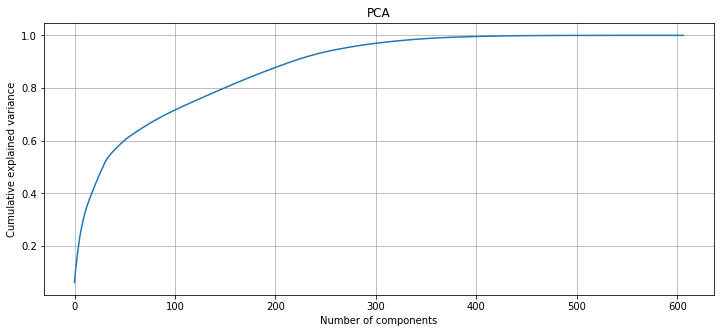

In [70]:
#Explained variance
from sklearn.decomposition import PCA
pca = PCA().fit(datos_std)
plt.figure(figsize=(12,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA')
plt.xlabel('Number of components',fontsize=10)
plt.ylabel('Cumulative explained variance')
plt.grid()
plt.show()

### Selección automática del número de factores que maximizan la sensibilidad

In [71]:
a=datos.shape
variables=a[1]
var_Acum=np.cumsum(pca.explained_variance_ratio_)

In [72]:
List = [0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95]
#List = [0.1,0.6,0.95]
List

[0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]

In [73]:
yL=[]
yL
comp=[]
comp
vbles=[]
vbles

counter=0
for i in range(0,len(List)):
         
    k=int(i)
    var_Acum_2=var_Acum[var_Acum>List[k]]
    b=var_Acum_2.shape
    variables_2=b[0]
    componentes=variables-variables_2
      
    
    pca = PCA(n_components=componentes) 
    pca_comp = pca.fit_transform(datos_std) 
    
    Factores=pd.DataFrame(pca_comp)
    
    xL=[]
    xL
    counter1=0  

    for j in Factores[:]:
        pre='Factor_'  
        x= pre + str(j)
        xL.append(x)
        counter1=counter1+1
        
        
    Factores.columns=xL  
    
# Se Crean Dummy
    Var_Cat = pd.get_dummies(datos_)

# Unión Tablas - 2.2
    datos_PCA=pd.concat([Factores,Var_Cat,y],axis=1)
    datos_PCA.drop(datos_PCA[datos_PCA.Factor_0.isnull()].index, inplace=True)
    datos_PCA.drop(datos_PCA[datos_PCA.CALIF_CART_CLIENTE_12_N.isnull()].index, inplace=True)
# MODELOS   
    y=datos_PCA['Target']
    y=pd.DataFrame(y)
    del datos_PCA['Target']
    
    X_train, X_test, y_train, y_test = train_test_split(datos_PCA, y, test_size = .3, random_state=24)
    
# Regresión Logistica
    LogReg = LogisticRegression()
    LogReg.fit(X_train, y_train)
    y_pred = LogReg.predict(X_test)
    
    confusion = metrics.confusion_matrix(y_test, y_pred)
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]

    Sensitivity = str(round(TP / float(TP + FN),2)) 
    
    yL.append(Sensitivity)
    vbles.append(variables)
    comp.append(componentes)
    print(k)
    print(yL)
    counter=counter+1

C:\Users\camiloto\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0
['0.7']
1
['0.7', '0.76']
2
['0.7', '0.76', '0.77']
3
['0.7', '0.76', '0.77', '0.79']
4
['0.7', '0.76', '0.77', '0.79', '0.79']
5
['0.7', '0.76', '0.77', '0.79', '0.79', '0.79']
6
['0.7', '0.76', '0.77', '0.79', '0.79', '0.79', '0.79']
7
['0.7', '0.76', '0.77', '0.79', '0.79', '0.79', '0.79', '0.79']


In [74]:
PCA_Recall_1=pd.DataFrame(yL,List)
PCA_Recall_2=pd.DataFrame(comp,vbles)
PCA_Recall_1,PCA_Recall_2

(         0
 0.60   0.7
 0.65  0.76
 0.70  0.77
 0.75  0.79
 0.80  0.79
 0.85  0.79
 0.90  0.79
 0.95  0.79,        0
 607   50
 607   69
 607   92
 607  120
 607  149
 607  181
 607  216
 607  267)

De acuerdo con el procedimiento anterior, el parámetro óptimo para la selección del número de componentes principales es de **0.7**, sin embargo, a manera de experimento se realizaron las corridas con 0.75 y 0.80, de lo cual se observa que el rendimiento de los algotítmos mejora..... 

## Implementación de los modelos con base en el PCA

In [75]:
a=datos.shape
variables=a[1]
var_Acum=np.cumsum(pca.explained_variance_ratio_)
var_Acum_2=var_Acum[var_Acum>0.8]
b=var_Acum_2.shape
variables_2=b[0]
componentes=variables-variables_2
variables,componentes

pca = PCA(n_components=componentes) 
pca_comp = pca.fit_transform(datos_std) 
    
Factores=pd.DataFrame(pca_comp)
    
xL=[]
xL

for j in Factores[:]:
        pre='Factor_'  
        x= pre + str(j)
        xL.append(x)
        counter1=counter1+1
        
        
Factores.columns=xL  
    
# Se Crean Dummy
Var_Cat = pd.get_dummies(datos_)

# Unión Tablas - 2.2
datos_PCA=pd.concat([Factores,Var_Cat,y],axis=1)
datos_PCA.drop(datos_PCA[datos_PCA.Factor_0.isnull()].index, inplace=True)
datos_PCA.drop(datos_PCA[datos_PCA.CALIF_CART_CLIENTE_12_N.isnull()].index, inplace=True)

# MODELOS   
y=datos_PCA['Target']
y=pd.DataFrame(y)
del datos_PCA['Target']
    
X_train_, X_test_, y_train_, y_test_ = train_test_split(datos_PCA, y, test_size = .3, random_state=24)

### 2.4.1. Regresión Logistica

El siguiente paso en la metodología, es la implementación de los modelos de regresión logística y la red reuronal, teniendo como input los componentes principales - PCA

In [76]:
LogReg_2 = LogisticRegression()
LogReg_2.fit(X_train_, y_train_)

C:\Users\camiloto\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [77]:
y_pred_RL2 = LogReg_2.predict(X_test_)

In [78]:
target_names = ['No abandono', 'Si abandono']
print(classification_report(y_test_, y_pred_RL2, target_names=target_names))

             precision    recall  f1-score   support

No abandono       0.95      0.96      0.95     38914
Si abandono       0.82      0.79      0.81      9659

avg / total       0.92      0.92      0.92     48573



Text(0.5,1,'Confusion Matrix')

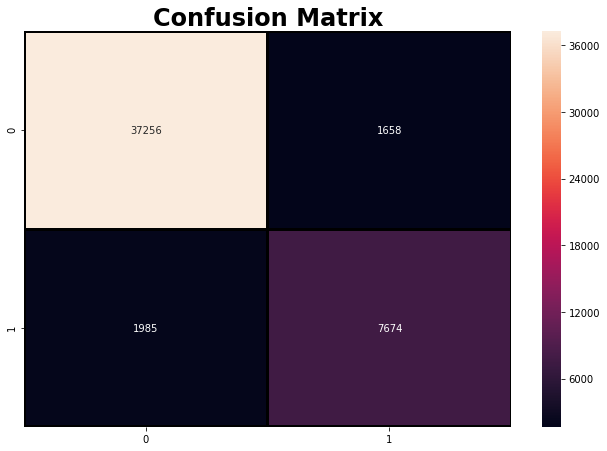

In [79]:
plt.figure(figsize=(24,16))
plt.subplot(221)
sb.heatmap(confusion_matrix(y_test_,y_pred_RL2),annot=True,fmt = "d",linecolor="k",linewidths=2)
plt.title("Confusion Matrix",fontsize=24,fontweight="bold")

## Métricas calculadas a partir de una matriz de confusión

In [80]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test_, y_pred_RL2)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

### Cálculo de las métricas

Accuracy= ("Accuracy               = "+str(round((TP + TN) / float(TP + TN + FP + FN),2)))

Classification_Error = ("Classification Error   = "+str(round((FP + FN) / float(TP + TN + FP + FN),2)))

Sensitivity = ("Sensitivity            = " +str(round(TP / float(TP + FN),2)))

Specificity =("Specificity            = " +str(round(TN / float(TN + FP),2)))

Precision=("Precision              = "+str  (round(TP / float(TP + FP),3)))

print("---------------------Métricas modelo 2 **Regresión Logística con PCA** ------------------------------------------------")
print(Accuracy),print(Classification_Error), print(Sensitivity), print(Specificity), print(False_Positive_rate),
print(Precision)

---------------------Métricas modelo 2 **Regresión Logística con PCA** ------------------------------------------------
Accuracy               = 0.92
Classification Error   = 0.08
Sensitivity            = 0.79
Specificity            = 0.96
False Positive Rate    = 0.02
Precision              = 0.822


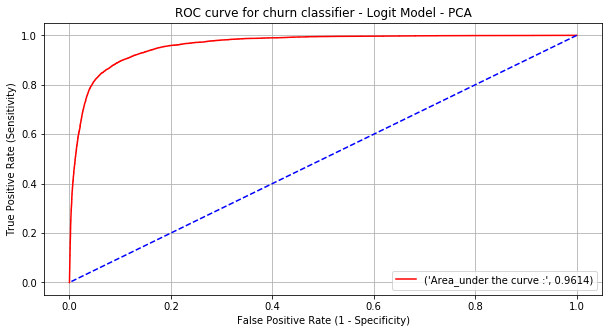

In [81]:
predicting_probabilites_3 = LogReg_2.predict_proba(X_test_)[:,1]
fpr,tpr,thresholds = roc_curve(y_test, predicting_probabilites_3)
#plot.subplot(222)
plt.figure(figsize=(10,5))
plt.plot(fpr,tpr,label = ("Area_under the curve :",round(auc(fpr,tpr),4)),color = "r")
plt.plot([1,0],[1,0],linestyle = "dashed",color ="b")
plt.legend(loc = "best")
# show the plot
plt.title('ROC curve for churn classifier - Logit Model - PCA')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
pyplot.show()

## 2.4.2. Neural network training in Keras

El último modelo implementado es al red neuronal, el cual tiene como input los componentes principales, que mejoraron significativamente el modelo de regresión logística.

In [82]:
X_train_.shape[:]

(113337, 2325)

#### Modelo

In [83]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout

model = Sequential()
model.add(Dense(64, input_shape= X_train_.shape[1:]))
model.add(Activation('relu'))
model.add(Dropout(0.5))

#model.add(Dense(24))
#model.add(Activation('relu'))
#model.add(Dropout(0.5))

model.add(Dense(units=1))
model.add(Activation('sigmoid'))

In [84]:
model.summary(70)

______________________________________________________________________
Layer (type)                   Output Shape                Param #    
dense_1 (Dense)                (None, 64)                  148864     
______________________________________________________________________
activation_1 (Activation)      (None, 64)                  0          
______________________________________________________________________
dropout_1 (Dropout)            (None, 64)                  0          
______________________________________________________________________
dense_2 (Dense)                (None, 1)                   65         
______________________________________________________________________
activation_2 (Activation)      (None, 1)                   0          
Total params: 148,929
Trainable params: 148,929
Non-trainable params: 0
______________________________________________________________________


In [85]:
# Optimizers
from keras.optimizers import Adam 
from keras.optimizers import RMSprop
from keras.optimizers import Adamax
from keras.optimizers import SGD
from keras.optimizers import Nadam

In [86]:

model.compile(loss = 'binary_crossentropy',
              optimizer = RMSprop(lr=0.001), #decay=0.0),
              metrics = ['accuracy'])

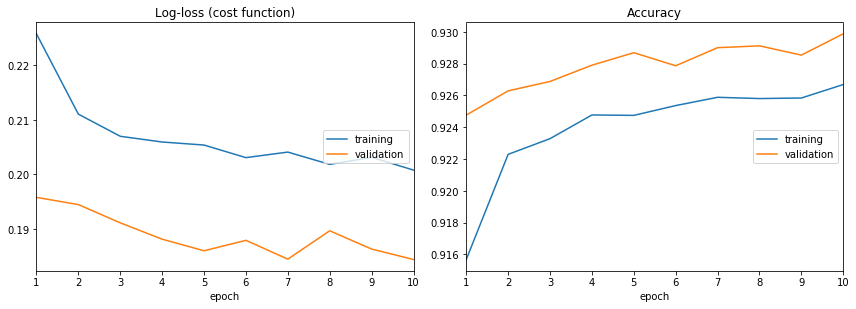

In [87]:

model.fit(X_train_, y_train_, epochs=10, verbose=1,
         validation_data = [X_train_, y_train_],callbacks=[PlotLossesKeras()])

In [88]:
y_pred_RN = model.predict(X_test_)
y_pred_RN = (y_pred_RN> 0.5)
#y_pred_RN

In [89]:
# evaluamos y Predecimos
scores = model.evaluate(X_test_, y_test_)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

48573/48573 [==============================] - 3s 61us/step

acc: 92.83%


In [90]:

#cm = confusion_matrix(y_test, y_pred_2.round(), normalize=False)
print(classification_report(y_test_, y_pred_RN, target_names=target_names))

             precision    recall  f1-score   support

No abandono       0.95      0.96      0.96     38914
Si abandono       0.83      0.80      0.82      9659

avg / total       0.93      0.93      0.93     48573



Text(0.5,1,'Confusion Matrix')

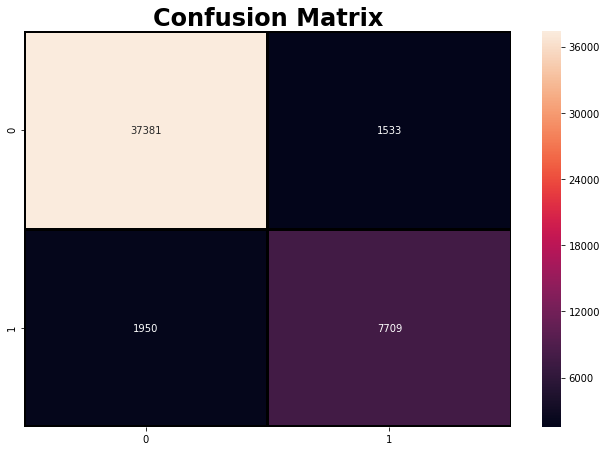

In [91]:
plt.figure(figsize=(24,16))
plt.subplot(221)
sb.heatmap(confusion_matrix(y_test_,y_pred_RN),annot=True,fmt = "d",linecolor="k",linewidths=2)
plt.title("Confusion Matrix",fontsize=24,fontweight="bold")

## Métricas calculadas a partir de una matriz de confusión

In [92]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test_, y_pred_RN)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

### Cálculo de las métricas

Accuracy= ("Accuracy               = "+str(round((TP + TN) / float(TP + TN + FP + FN),2)))

Classification_Error = ("Classification Error   = "+str(round((FP + FN) / float(TP + TN + FP + FN),2)))

Sensitivity = ("Sensitivity            = " +str(round(TP / float(TP + FN),2)))

Specificity =("Specificity            = " +str(round(TN / float(TN + FP),2)))

Precision=("Precision              = "+str  (round(TP / float(TP + FP),3)))

print("---------------------Métricas modelo 3 **Neural Network con PCA** ------------------------------------------------")
print(Accuracy),print(Classification_Error), print(Sensitivity), print(Specificity), print(False_Positive_rate),
print(Precision)

---------------------Métricas modelo 3 **Neural Network con PCA** ------------------------------------------------
Accuracy               = 0.93
Classification Error   = 0.07
Sensitivity            = 0.8
Specificity            = 0.96
False Positive Rate    = 0.02
Precision              = 0.834


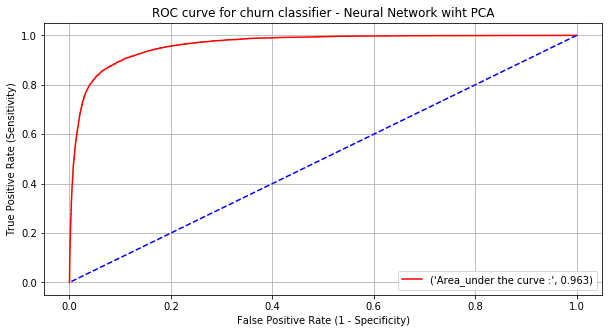

In [93]:
predicting_probabilites_ = model.predict_proba(X_test_)[:]
fpr,tpr,thresholds = roc_curve(y_test_, predicting_probabilites_)
#plot.subplot(222)
plt.figure(figsize=(10,5))
plt.plot(fpr,tpr,label = ("Area_under the curve :",round(auc(fpr,tpr),4)),color = "r")
plt.plot([1,0],[1,0],linestyle = "dashed",color ="b")
plt.legend(loc = "best")
# show the plot
plt.title('ROC curve for churn classifier - Neural Network wiht PCA')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
pyplot.show()


Se puede ver cómo le red neuronal mejora en un punto el porcentaje de sensibilidad, pasando de 0.83 a 0.84, las demás métricas se mantienen, con esto podemos concluir que aunque se implementó una red neuronal, sencilla, con una capa, 64 neuronas, activación relu y salida sigmoide, los resultados son muy similares a los obtenidos por la regresión logística, además, la red neuronal tiene un costo más alto en cuanto al procesamiento, ya que el procesamiento del modelo tarda más de 10 veces que el de regresión logística.
